### import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import warnings
import pickle

In [2]:
warnings.filterwarnings(action="ignore")
pd.options.display.max_columns = None

## Read data

In [3]:
def readCsvFile(filepath):
    """
        Function to read csv file
        args:
            filepath : path to csv file
        return:
            df : dataframe
    """
    
    df = pd.read_csv(filepath)
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    
    df.drop(df.columns[-1], inplace=True, axis = 1)
    
    return df

In [4]:
raw_aid_df = readCsvFile('../data/API_DT.ODA.ALLD.CD_DS2_en_csv_v2_5362759.csv')
raw_infltn_df = readCsvFile("../data/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_5358428.csv")
raw_pvrty_df = readCsvFile("../data/API_SI.POV.DDAY_DS2_en_csv_v2_5358982.csv")
raw_unemplmnt_df = readCsvFile("../data/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_5358416.csv")
cntry_code_dtl = readCsvFile('../data/country_code_dtls.csv')

In [5]:
with open("../data/latin_america_southeast_asia_usaid_complete.pickle", "rb") as file_:
    raw_us_aid = pickle.load(file_)

# EDA

In [6]:
raw_us_aid.head(2)

country_id country_code country_name  region_id         region_name  \
0          32          ARG    Argentina          6  Western Hemisphere   
1          32          ARG    Argentina          6  Western Hemisphere   

   income_group_id            income_group_name income_group_acronym  \
0              3.0  Upper Middle Income Country                 UMIC   
1              3.0  Upper Middle Income Country                 UMIC   

   managing_agency_id managing_agency_acronym  \
0                   1                   USAID   
1                   1                   USAID   

                        managing_agency_name  \
0  U.S. Agency for International Development   
1  U.S. Agency for International Development   

   managing_sub-agency_or_bureau_id managing_sub-agency_or_bureau_acronym  \
0                                23                                    EE   
1                                23                                    EE   

  managing_sub-agency_or_bureau_name  implementing_partner_category_id  \
0      Bureau for Europe and Eurasia                                 1   
1      Bureau for Europe and Eurasia                                 1   

  implementing_partner_category_name  implementing_partner_sub-category_id  \
0                         Government                                     1   
1                         Government                                     1   

  implementing_partner_sub-category_name  implementing_partner_id  \
0             Government - United States                  1000001   
1             Government - United States                  1000001   

                           implementing_partner_name  \
0  U.S. Government - U.S. Agency for Internationa...   
1  U.S. Government - U.S. Agency for Internationa...   

   international_category_id international_category_name  \
0                         10        Administrative Costs   
1                         10        Administrative Costs   

   international_sector_code international_sector_name  \
0                        911        Operating Expenses   
1                        911        Operating Expenses   

   international_purpose_code international_purpose_name  us_category_id  \
0                       91010         Operating Expenses               8   
1                       91010         Operating Expenses               8   

  us_category_name  us_sector_id               us_sector_name  \
0  Program Support            41  Direct Administrative Costs   
1  Program Support            41  Direct Administrative Costs   

  funding_account_id                               funding_account_name  \
0            72x1000  Agency for International Development, Operatin...   
1            72x1000  Agency for International Development, Operatin...   

   funding_agency_id                        funding_agency_name  \
0                  1  U.S. Agency for International Development   
1                  1  U.S. Agency for International Development   

  funding_agency_acronym  foreign_assistance_objective_id  \
0                  USAID                                1   
1                  USAID                                1   

  foreign_assistance_objective_name  aid_type_group_id   aid_type_group_name  \
0                          Economic                  6  Administrative Costs   
1                          Economic                  6  Administrative Costs   

   aid_type_id                                aid_type_name  activity_id  \
0           17  Administrative costs not included elsewhere       121438   
1           17  Administrative costs not included elsewhere       121438   

   submission_id     activity_name activity_description  \
0             76  OE TRUSFUNDS COR       OE Trust Funds   
1             76  OE TRUSFUNDS COR       OE Trust Funds   

  activity_project_number activity_budget_amount activity_start_date  \
0                      OE                    NaN                 NaN   
1                 

In [7]:
raw_us_aid['fiscal_year'] = np.where(raw_us_aid.fiscal_year=="1976tq", "1976", raw_us_aid.fiscal_year)

In [8]:
raw_us_aid['fiscal_year'] = raw_us_aid['fiscal_year'].astype(int)

In [9]:
# aid in millions
raw_us_aid['amount_in_mil'] = (raw_us_aid['constant_dollar_amount'].astype(float)/1000000).round(2)

In [10]:
plot_df = raw_us_aid.groupby(['us_category_name', 'fiscal_year','region_extd'])\
                .agg({'amount_in_mil':np.nanmean}).reset_index()

Text(0.5, 1.0, 'Average US Aid to Latin America by Category : 2001 - 2022')

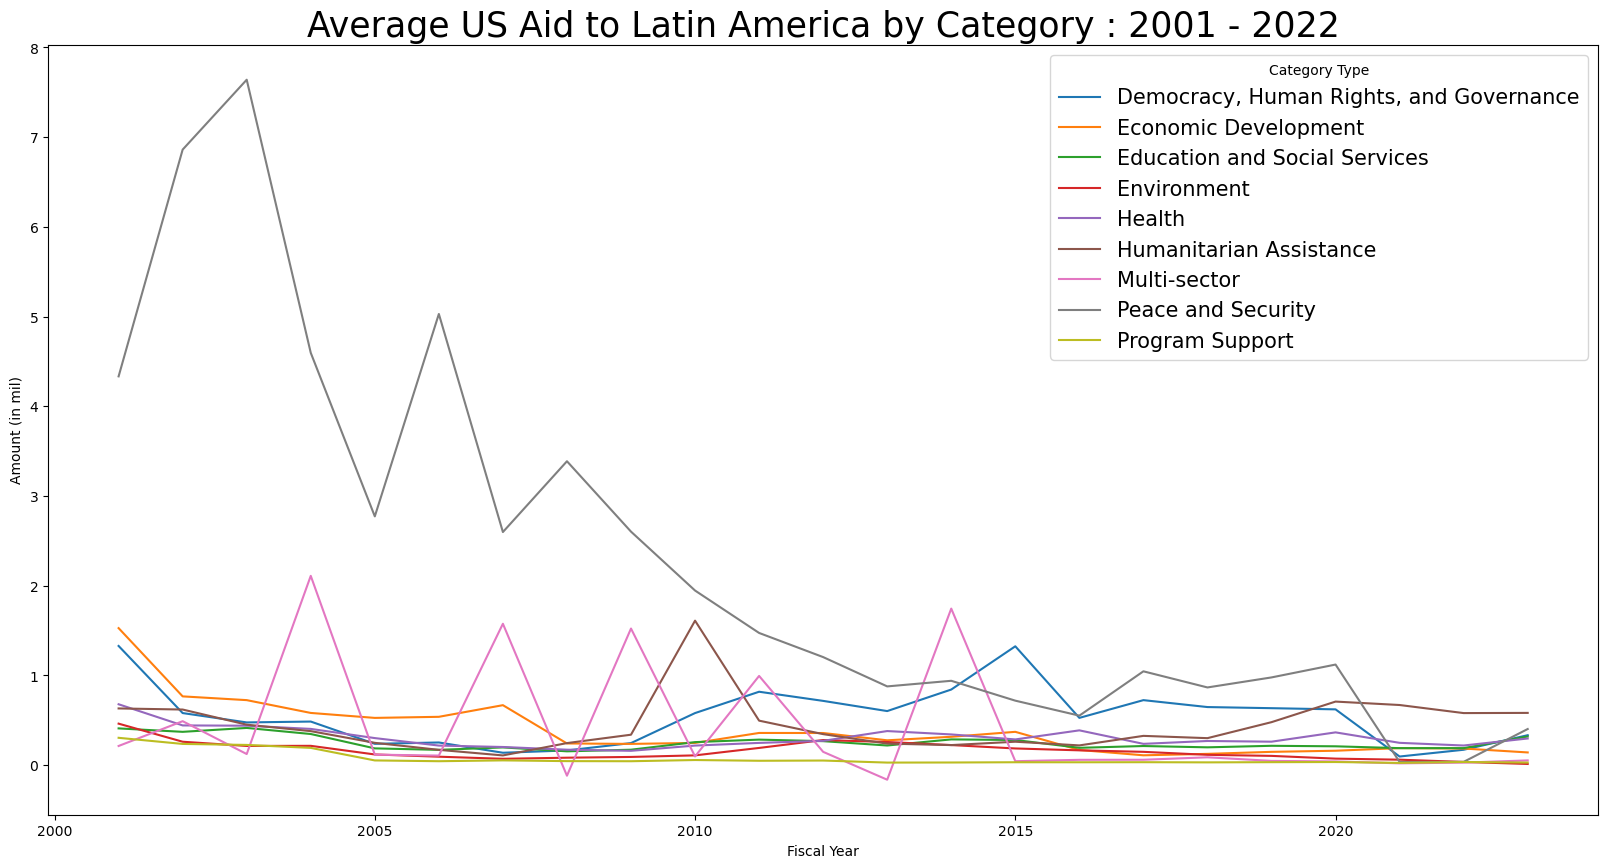

In [11]:
plt.figure(figsize=(20, 10))
sns.lineplot(y = "amount_in_mil", 
            x = "fiscal_year",
             data = plot_df[(plot_df.region_extd=='Latin America') & (plot_df.fiscal_year>2000)], 
            hue = "us_category_name")
plt.xlabel("Fiscal Year")
plt.ylabel("Amount (in mil)")
plt.legend(loc="best", prop={'size': 15}, title="Category Type")
plt.title("Average US Aid to Latin America by Category : 2001 - 2022", fontsize=25)

In [12]:
raw_us_aid.head(2)

country_id country_code country_name  region_id         region_name  \
0          32          ARG    Argentina          6  Western Hemisphere   
1          32          ARG    Argentina          6  Western Hemisphere   

   income_group_id            income_group_name income_group_acronym  \
0              3.0  Upper Middle Income Country                 UMIC   
1              3.0  Upper Middle Income Country                 UMIC   

   managing_agency_id managing_agency_acronym  \
0                   1                   USAID   
1                   1                   USAID   

                        managing_agency_name  \
0  U.S. Agency for International Development   
1  U.S. Agency for International Development   

   managing_sub-agency_or_bureau_id managing_sub-agency_or_bureau_acronym  \
0                                23                                    EE   
1                                23                                    EE   

  managing_sub-agency_or_bureau_name  implementing_partner_category_id  \
0      Bureau for Europe and Eurasia                                 1   
1      Bureau for Europe and Eurasia                                 1   

  implementing_partner_category_name  implementing_partner_sub-category_id  \
0                         Government                                     1   
1                         Government                                     1   

  implementing_partner_sub-category_name  implementing_partner_id  \
0             Government - United States                  1000001   
1             Government - United States                  1000001   

                           implementing_partner_name  \
0  U.S. Government - U.S. Agency for Internationa...   
1  U.S. Government - U.S. Agency for Internationa...   

   international_category_id international_category_name  \
0                         10        Administrative Costs   
1                         10        Administrative Costs   

   international_sector_code international_sector_name  \
0                        911        Operating Expenses   
1                        911        Operating Expenses   

   international_purpose_code international_purpose_name  us_category_id  \
0                       91010         Operating Expenses               8   
1                       91010         Operating Expenses               8   

  us_category_name  us_sector_id               us_sector_name  \
0  Program Support            41  Direct Administrative Costs   
1  Program Support            41  Direct Administrative Costs   

  funding_account_id                               funding_account_name  \
0            72x1000  Agency for International Development, Operatin...   
1            72x1000  Agency for International Development, Operatin...   

   funding_agency_id                        funding_agency_name  \
0                  1  U.S. Agency for International Development   
1                  1  U.S. Agency for International Development   

  funding_agency_acronym  foreign_assistance_objective_id  \
0                  USAID                                1   
1                  USAID                                1   

  foreign_assistance_objective_name  aid_type_group_id   aid_type_group_name  \
0                          Economic                  6  Administrative Costs   
1                          Economic                  6  Administrative Costs   

   aid_type_id                                aid_type_name  activity_id  \
0           17  Administrative costs not included elsewhere       121438   
1           17  Administrative costs not included elsewhere       121438   

   submission_id     activity_name activity_description  \
0             76  OE TRUSFUNDS COR       OE Trust Funds   
1             76  OE TRUSFUNDS COR       OE Trust Funds   

  activity_project_number activity_budget_amount activity_start_date  \
0                      OE                    NaN                 NaN   
1                 

In [13]:
raw_us_aid.us_category_name.value_counts()

Program Support                            236488
Health                                      75476
Economic Development                        73716
Democracy, Human Rights, and Governance     71508
Peace and Security                          63860
Education and Social Services               44551
Humanitarian Assistance                     39938
Environment                                 31620
Multi-sector                                 2663
Name: us_category_name, dtype: int64

In [14]:
plot_df = raw_us_aid.query("transaction_type_name == 'Disbursements'")\
        .groupby(["fiscal_year", "us_category_name"]).agg({'country_id':"nunique"}).reset_index()\
        .sort_values("fiscal_year", ascending=True)

In [15]:
plot_df.head()

fiscal_year                         us_category_name  country_id
0         2001  Democracy, Human Rights, and Governance          28
1         2001                     Economic Development          26
2         2001            Education and Social Services          21
3         2001                              Environment          15
4         2001                                   Health          20

Text(0.5, 1.0, 'US Aid Recipient Countries by Category')

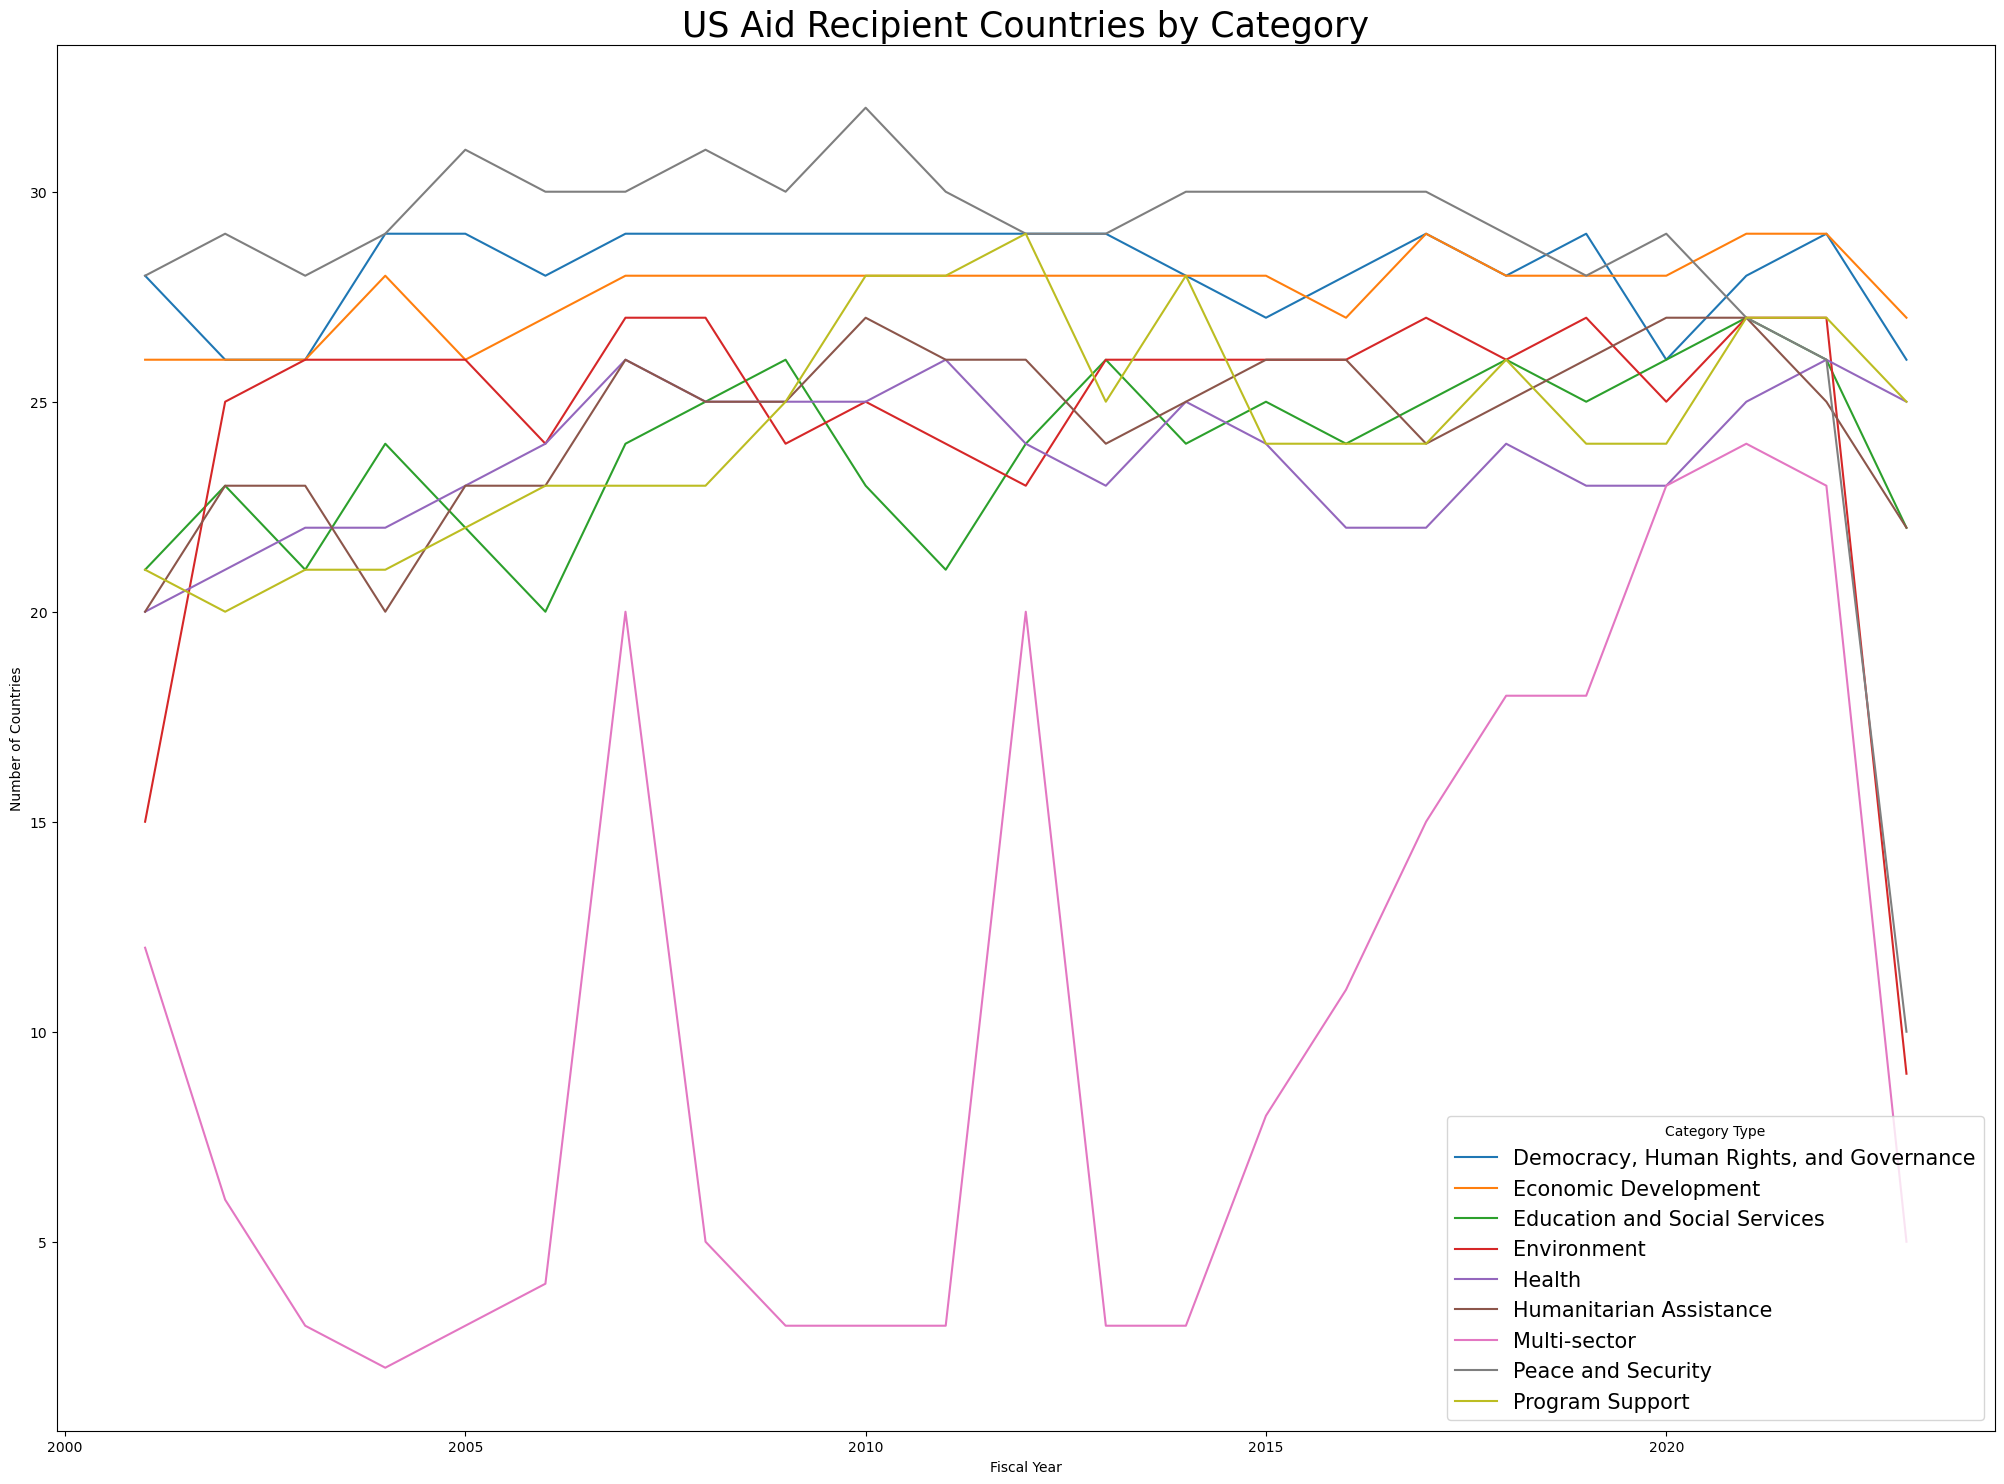

In [16]:
plt.figure(figsize=(25, 18))
sns.lineplot(y = "country_id", 
            x = "fiscal_year",
             data = plot_df, 
            hue = "us_category_name")
plt.xlabel("Fiscal Year")
plt.ylabel("Number of Countries")
plt.legend(loc="best", prop={'size': 15}, title="Category Type")
plt.title("US Aid Recipient Countries by Category", fontsize=25)

In [17]:
raw_us_aid[raw_us_aid.fiscal_year==1960]['transaction_type_name'].value_counts()

Obligations    146
Name: transaction_type_name, dtype: int64

In [18]:
raw_us_aid.head(2)

country_id country_code country_name  region_id         region_name  \
0          32          ARG    Argentina          6  Western Hemisphere   
1          32          ARG    Argentina          6  Western Hemisphere   

   income_group_id            income_group_name income_group_acronym  \
0              3.0  Upper Middle Income Country                 UMIC   
1              3.0  Upper Middle Income Country                 UMIC   

   managing_agency_id managing_agency_acronym  \
0                   1                   USAID   
1                   1                   USAID   

                        managing_agency_name  \
0  U.S. Agency for International Development   
1  U.S. Agency for International Development   

   managing_sub-agency_or_bureau_id managing_sub-agency_or_bureau_acronym  \
0                                23                                    EE   
1                                23                                    EE   

  managing_sub-agency_or_bureau_name  implementing_partner_category_id  \
0      Bureau for Europe and Eurasia                                 1   
1      Bureau for Europe and Eurasia                                 1   

  implementing_partner_category_name  implementing_partner_sub-category_id  \
0                         Government                                     1   
1                         Government                                     1   

  implementing_partner_sub-category_name  implementing_partner_id  \
0             Government - United States                  1000001   
1             Government - United States                  1000001   

                           implementing_partner_name  \
0  U.S. Government - U.S. Agency for Internationa...   
1  U.S. Government - U.S. Agency for Internationa...   

   international_category_id international_category_name  \
0                         10        Administrative Costs   
1                         10        Administrative Costs   

   international_sector_code international_sector_name  \
0                        911        Operating Expenses   
1                        911        Operating Expenses   

   international_purpose_code international_purpose_name  us_category_id  \
0                       91010         Operating Expenses               8   
1                       91010         Operating Expenses               8   

  us_category_name  us_sector_id               us_sector_name  \
0  Program Support            41  Direct Administrative Costs   
1  Program Support            41  Direct Administrative Costs   

  funding_account_id                               funding_account_name  \
0            72x1000  Agency for International Development, Operatin...   
1            72x1000  Agency for International Development, Operatin...   

   funding_agency_id                        funding_agency_name  \
0                  1  U.S. Agency for International Development   
1                  1  U.S. Agency for International Development   

  funding_agency_acronym  foreign_assistance_objective_id  \
0                  USAID                                1   
1                  USAID                                1   

  foreign_assistance_objective_name  aid_type_group_id   aid_type_group_name  \
0                          Economic                  6  Administrative Costs   
1                          Economic                  6  Administrative Costs   

   aid_type_id                                aid_type_name  activity_id  \
0           17  Administrative costs not included elsewhere       121438   
1           17  Administrative costs not included elsewhere       121438   

   submission_id     activity_name activity_description  \
0             76  OE TRUSFUNDS COR       OE Trust Funds   
1             76  OE TRUSFUNDS COR       OE Trust Funds   

  activity_project_number activity_budget_amount activity_start_date  \
0                      OE                    NaN                 NaN   
1                 

In [19]:
tmp_df = raw_us_aid.groupby(["fiscal_year", "transaction_type_name"])\
                    .agg({"funding_agency_acronym":"unique"}).reset_index()

In [20]:
# tmp_df = tmp_df.set_index(['fiscal_year','transaction_type_name']).unstack(fill_value=0).stack().reset_index()

In [21]:
tmp_df['funding_agency_acronym'] = np.where(tmp_df.funding_agency_acronym.isin([0]), 0, 1)

<AxesSubplot:xlabel='fiscal_year', ylabel='constant_dollar_amount'>

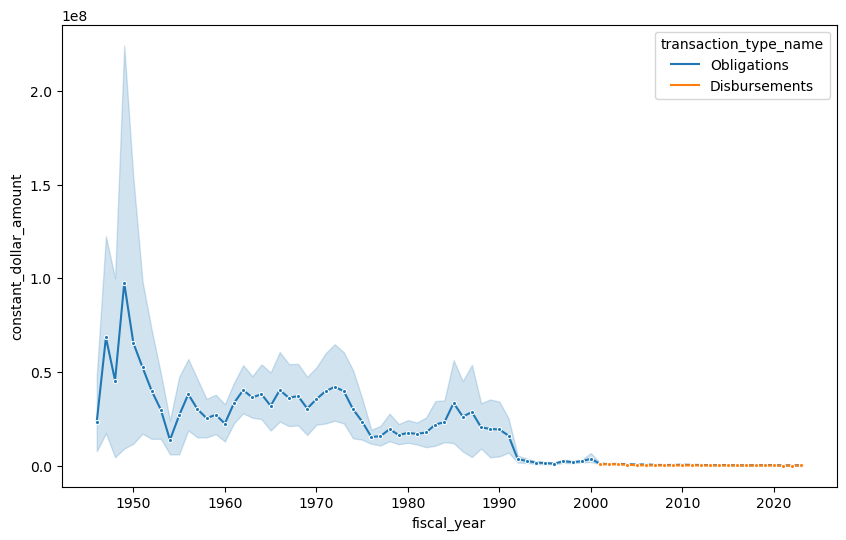

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='fiscal_year', y = "constant_dollar_amount", data = raw_us_aid,
             marker = ".",
             hue = "transaction_type_name")

In [23]:
raw_us_aid.groupby("fiscal_year")\
        .agg({'constant_dollar_amount':[np.nanmin, np.nanmean, np.nanmedian, np.nanmax]}).reset_index()

fiscal_year constant_dollar_amount                                     
                               nanmin       nanmean  nanmedian      nanmax
0         1946                  10895  2.353956e+07  4357895.0   308321053
1         1947                   9823  6.844354e+07  3929249.0   647343831
2         1948                   8972  4.544875e+07  2691489.0   767971631
3         1949               -2603277  9.742930e+07  3471037.0  1549817835
4         1950                   8798  6.546567e+07  3959235.0  1213285549
..         ...                    ...           ...        ...         ...
73        2019              -29280006  1.998736e+05     7208.5   270269506
74        2020              -10000000  2.170955e+05    10000.0   268679844
75        2021               -8439579  9.426396e+04     2445.0    47691527
76        2022               -6011229  1.312358e+05     6541.0    55037317
77        2023               -1420875  1.522202e+05    10089.5    47362509

[78 rows x 5 columns]

# Transformation

In [24]:
raw_us_aid.head(2)

country_id country_code country_name  region_id         region_name  \
0          32          ARG    Argentina          6  Western Hemisphere   
1          32          ARG    Argentina          6  Western Hemisphere   

   income_group_id            income_group_name income_group_acronym  \
0              3.0  Upper Middle Income Country                 UMIC   
1              3.0  Upper Middle Income Country                 UMIC   

   managing_agency_id managing_agency_acronym  \
0                   1                   USAID   
1                   1                   USAID   

                        managing_agency_name  \
0  U.S. Agency for International Development   
1  U.S. Agency for International Development   

   managing_sub-agency_or_bureau_id managing_sub-agency_or_bureau_acronym  \
0                                23                                    EE   
1                                23                                    EE   

  managing_sub-agency_or_bureau_name  implementing_partner_category_id  \
0      Bureau for Europe and Eurasia                                 1   
1      Bureau for Europe and Eurasia                                 1   

  implementing_partner_category_name  implementing_partner_sub-category_id  \
0                         Government                                     1   
1                         Government                                     1   

  implementing_partner_sub-category_name  implementing_partner_id  \
0             Government - United States                  1000001   
1             Government - United States                  1000001   

                           implementing_partner_name  \
0  U.S. Government - U.S. Agency for Internationa...   
1  U.S. Government - U.S. Agency for Internationa...   

   international_category_id international_category_name  \
0                         10        Administrative Costs   
1                         10        Administrative Costs   

   international_sector_code international_sector_name  \
0                        911        Operating Expenses   
1                        911        Operating Expenses   

   international_purpose_code international_purpose_name  us_category_id  \
0                       91010         Operating Expenses               8   
1                       91010         Operating Expenses               8   

  us_category_name  us_sector_id               us_sector_name  \
0  Program Support            41  Direct Administrative Costs   
1  Program Support            41  Direct Administrative Costs   

  funding_account_id                               funding_account_name  \
0            72x1000  Agency for International Development, Operatin...   
1            72x1000  Agency for International Development, Operatin...   

   funding_agency_id                        funding_agency_name  \
0                  1  U.S. Agency for International Development   
1                  1  U.S. Agency for International Development   

  funding_agency_acronym  foreign_assistance_objective_id  \
0                  USAID                                1   
1                  USAID                                1   

  foreign_assistance_objective_name  aid_type_group_id   aid_type_group_name  \
0                          Economic                  6  Administrative Costs   
1                          Economic                  6  Administrative Costs   

   aid_type_id                                aid_type_name  activity_id  \
0           17  Administrative costs not included elsewhere       121438   
1           17  Administrative costs not included elsewhere       121438   

   submission_id     activity_name activity_description  \
0             76  OE TRUSFUNDS COR       OE Trust Funds   
1             76  OE TRUSFUNDS COR       OE Trust Funds   

  activity_project_number activity_budget_amount activity_start_date  \
0                      OE                    NaN                 NaN   
1                 

In [25]:
raw_us_aid.groupby(['fiscal_year', "us_category_name", "transaction_type_name"]).size().reset_index()

fiscal_year      us_category_name transaction_type_name     0
0           1946  Economic Development           Obligations    33
1           1947  Economic Development           Obligations    37
2           1948  Economic Development           Obligations    35
3           1949  Economic Development           Obligations    29
4           1950  Economic Development           Obligations    32
..           ...                   ...                   ...   ...
526         2023          Multi-sector         Disbursements     7
527         2023    Peace and Security         Disbursements    50
528         2023    Peace and Security           Obligations     3
529         2023       Program Support         Disbursements  2320
530         2023       Program Support           Obligations  1142

[531 rows x 4 columns]

In [26]:
raw_us_aid.head(2)

country_id country_code country_name  region_id         region_name  \
0          32          ARG    Argentina          6  Western Hemisphere   
1          32          ARG    Argentina          6  Western Hemisphere   

   income_group_id            income_group_name income_group_acronym  \
0              3.0  Upper Middle Income Country                 UMIC   
1              3.0  Upper Middle Income Country                 UMIC   

   managing_agency_id managing_agency_acronym  \
0                   1                   USAID   
1                   1                   USAID   

                        managing_agency_name  \
0  U.S. Agency for International Development   
1  U.S. Agency for International Development   

   managing_sub-agency_or_bureau_id managing_sub-agency_or_bureau_acronym  \
0                                23                                    EE   
1                                23                                    EE   

  managing_sub-agency_or_bureau_name  implementing_partner_category_id  \
0      Bureau for Europe and Eurasia                                 1   
1      Bureau for Europe and Eurasia                                 1   

  implementing_partner_category_name  implementing_partner_sub-category_id  \
0                         Government                                     1   
1                         Government                                     1   

  implementing_partner_sub-category_name  implementing_partner_id  \
0             Government - United States                  1000001   
1             Government - United States                  1000001   

                           implementing_partner_name  \
0  U.S. Government - U.S. Agency for Internationa...   
1  U.S. Government - U.S. Agency for Internationa...   

   international_category_id international_category_name  \
0                         10        Administrative Costs   
1                         10        Administrative Costs   

   international_sector_code international_sector_name  \
0                        911        Operating Expenses   
1                        911        Operating Expenses   

   international_purpose_code international_purpose_name  us_category_id  \
0                       91010         Operating Expenses               8   
1                       91010         Operating Expenses               8   

  us_category_name  us_sector_id               us_sector_name  \
0  Program Support            41  Direct Administrative Costs   
1  Program Support            41  Direct Administrative Costs   

  funding_account_id                               funding_account_name  \
0            72x1000  Agency for International Development, Operatin...   
1            72x1000  Agency for International Development, Operatin...   

   funding_agency_id                        funding_agency_name  \
0                  1  U.S. Agency for International Development   
1                  1  U.S. Agency for International Development   

  funding_agency_acronym  foreign_assistance_objective_id  \
0                  USAID                                1   
1                  USAID                                1   

  foreign_assistance_objective_name  aid_type_group_id   aid_type_group_name  \
0                          Economic                  6  Administrative Costs   
1                          Economic                  6  Administrative Costs   

   aid_type_id                                aid_type_name  activity_id  \
0           17  Administrative costs not included elsewhere       121438   
1           17  Administrative costs not included elsewhere       121438   

   submission_id     activity_name activity_description  \
0             76  OE TRUSFUNDS COR       OE Trust Funds   
1             76  OE TRUSFUNDS COR       OE Trust Funds   

  activity_project_number activity_budget_amount activity_start_date  \
0                      OE                    NaN                 NaN   
1                 

In [27]:
raw_us_aid.groupby(['country_name', "us_category_name",
                    "transaction_type_name", "foreign_assistance_objective_name"])\
        .agg({'fiscal_year':'unique'}).reset_index()

country_name                         us_category_name  \
0      Argentina  Democracy, Human Rights, and Governance   
1      Argentina  Democracy, Human Rights, and Governance   
2      Argentina                     Economic Development   
3      Argentina                     Economic Development   
4      Argentina                     Economic Development   
..           ...                                      ...   
617      Vietnam                       Peace and Security   
618      Vietnam                       Peace and Security   
619      Vietnam                       Peace and Security   
620      Vietnam                          Program Support   
621      Vietnam                          Program Support   

    transaction_type_name foreign_assistance_objective_name  \
0           Disbursements                          Economic   
1             Obligations                          Economic   
2           Disbursements                          Economic   
3             Obligations                          Economic   
4             Obligations                          Military   
..                    ...                               ...   
617         Disbursements                          Military   
618           Obligations                          Economic   
619           Obligations                          Military   
620         Disbursements                          Economic   
621           Obligations                          Economic   

                                           fiscal_year  
0    [2016, 2017, 2020, 2011, 2007, 2008, 2005, 200...  
1    [2017, 2015, 2012, 2020, 2011, 2007, 2021, 200...  
2    [2016, 2012, 2021, 2018, 2020, 2019, 2015, 201...  
3    [1963, 1989, 1991, 1992, 1993, 1994, 1959, 196...  
4    [1962, 1964, 1965, 1966, 1972, 1963, 1967, 196...  
..                                                 ...  
617  [2016, 2006, 2008, 2009, 2010, 2011, 2012, 201...  
618  [2008, 2009, 2010, 2013, 2012, 2018, 2011, 201...  
619  [2006, 2008, 2009, 2010, 2011, 2012, 2013, 201...  
620  [2015, 2017, 2018, 2019, 2020, 2022, 2008, 202...  
621  [2015, 2017, 2018, 2019, 2020, 2022, 2008, 202...  

[622 rows x 5 columns]

In [28]:
raw_us_aid.transaction_type_name.value_counts()

Disbursements    406864
Obligations      232956
Name: transaction_type_name, dtype: int64

In [29]:
# split the data into transaction types
oblgtn_df = raw_us_aid.query("transaction_type_name == 'Obligations'")
disbrsmnt_df = raw_us_aid.query("transaction_type_name != 'Obligations'")

In [30]:
oblgtn_df.shape, disbrsmnt_df.shape

((232956, 61), (406864, 61))

In [120]:
raw_us_aid.head()

country_id country_code country_name  region_id         region_name  \
0          32          ARG    Argentina          6  Western Hemisphere   
1          32          ARG    Argentina          6  Western Hemisphere   
2          32          ARG    Argentina          6  Western Hemisphere   
3          32          ARG    Argentina          6  Western Hemisphere   
4          32          ARG    Argentina          6  Western Hemisphere   

   income_group_id            income_group_name income_group_acronym  \
0              3.0  Upper Middle Income Country                 UMIC   
1              3.0  Upper Middle Income Country                 UMIC   
2              3.0  Upper Middle Income Country                 UMIC   
3              3.0  Upper Middle Income Country                 UMIC   
4              3.0  Upper Middle Income Country                 UMIC   

   managing_agency_id managing_agency_acronym  \
0                   1                   USAID   
1                   1                   USAID   
2                   1                   USAID   
3                   1                   USAID   
4                   1                   USAID   

                        managing_agency_name  \
0  U.S. Agency for International Development   
1  U.S. Agency for International Development   
2  U.S. Agency for International Development   
3  U.S. Agency for International Development   
4  U.S. Agency for International Development   

   managing_sub-agency_or_bureau_id managing_sub-agency_or_bureau_acronym  \
0                                23                                    EE   
1                                23                                    EE   
2                                23                                    EE   
3                                23                                    EE   
4                               999                                   NaN   

  managing_sub-agency_or_bureau_name  implementing_partner_category_id  \
0      Bureau for Europe and Eurasia                                 1   
1      Bureau for Europe and Eurasia                                 1   
2      Bureau for Europe and Eurasia                                 1   
3      Bureau for Europe and Eurasia                                 1   
4                     not applicable                                 1   

  implementing_partner_category_name  implementing_partner_sub-category_id  \
0                         Government                                     1   
1                         Government                                     1   
2                         Government                                     1   
3                         Government                                     1   
4                         Government                                     1   

  implementing_partner_sub-category_name  implementing_partner_id  \
0             Government - United States                  1000001   
1             Government - United States                  1000001   
2             Government - United States                  1000001   
3             Government - United States                  1000001   
4             Government - United States                  1999999   

                           implementing_partner_name  \
0  U.S. Government - U.S. Agency for Internationa...   
1  U.S. Government - U.S. Agency for Internationa...   
2  U.S. Government - U.S. Agency for Internationa...   
3  U.S. Government - U.S. Agency for Internationa...   
4                            U.S. Government - Other   

   international_category_id international_category_name  \
0                         10        Administrative Costs   
1                         10        Administrative Costs   
2                         10        Administrative Costs   
3                         10        Administrative Costs   
4                          7                       Other   

   international_sector_code international_sector_n

In [121]:
raw_us_aid.implementing_partner_category_name.unique()

array(['Government', 'Enterprises', 'NGO', 'Multilateral',
       'Universities and Research Institutes', 'Networks',
       'Church and Faith Based', 'Public and Private Partnerships'],
      dtype=object)

<AxesSubplot:xlabel='count', ylabel='implementing_partner_category_name'>

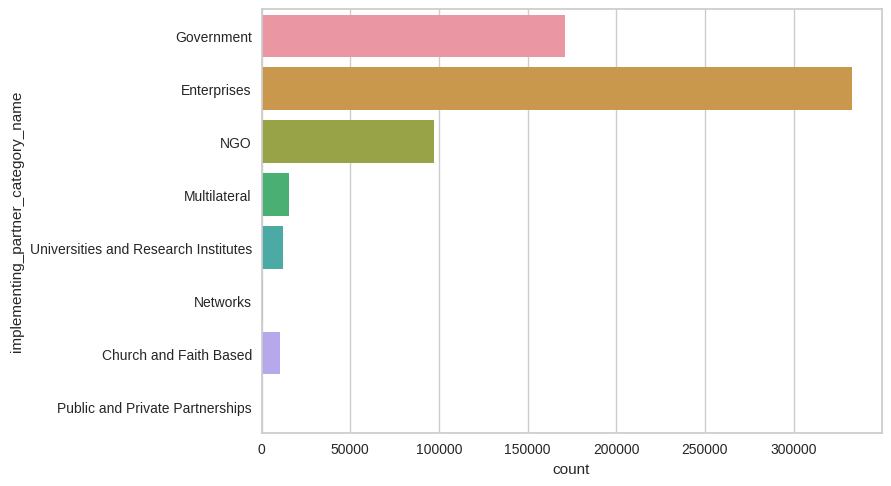

In [122]:
sns.countplot(y = "implementing_partner_category_name" , data = raw_us_aid)

# Text analytics

In [123]:
import re
from nltk.corpus import stopwords
import nltk

from sklearn.feature_extraction.text import CountVectorizer


In [124]:
# remove stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/kush/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [125]:
stop_words += ['usaid', 'aid', 'foreign', 'us']

In [126]:
# To lower case text
raw_us_aid['activity_description'] = raw_us_aid.activity_description.str.lower()

In [127]:
tokenized_doc = raw_us_aid['activity_description'].apply(lambda x: x.split())

In [128]:
# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [129]:
raw_us_aid['clean_activity'] = tokenized_doc.astype(str).str.replace('\[|\]|\'', '')
raw_us_aid['clean_activity'] = raw_us_aid['clean_activity'].str.replace(",",'')
raw_us_aid['clean_activity'] = raw_us_aid['clean_activity'].str.replace(r'\d+','')

In [130]:
raw_us_aid['clean_activity'] = raw_us_aid['clean_activity'].str.replace(r'[^\w\s]', '')


In [131]:
def top_n_words(text, n):
    
    most_freq_words = pd.Series(" ".join(text).split()).value_counts()
    return most_freq_words.head(n).sort_values(ascending = True).plot(kind="barh",title = "Top {n} Frequent Number Of Words".format(n = n))

## Common words

<AxesSubplot:title={'center':'Top 15 Frequent Number Of Words'}>

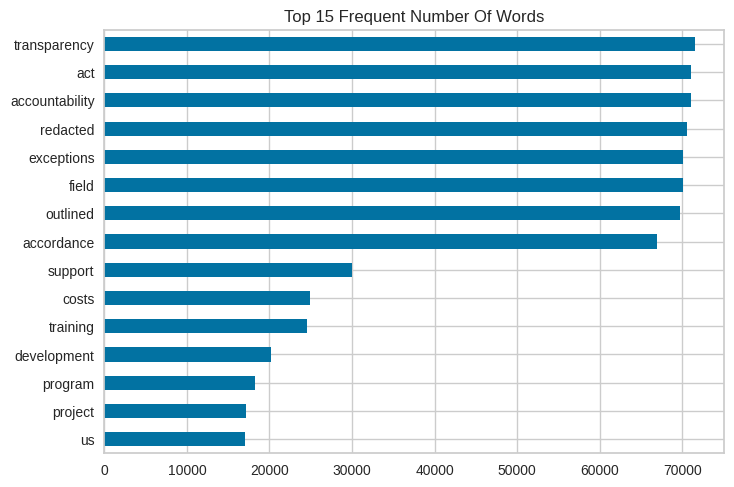

In [132]:
top_n_words(raw_us_aid[raw_us_aid.implementing_partner_category_name=='Government'].clean_activity, 15)

In [133]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')

In [134]:
sparse_matrix = word_vectorizer.fit_transform(raw_us_aid\
                                                [raw_us_aid.implementing_partner_category_name=='Government']\
                                              ['clean_activity'])

In [135]:
frequencies = sum(sparse_matrix).toarray()[0]

In [136]:
bi_grams_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [137]:
top20_bigrams = bi_grams_df["frequency"].sort_values(ascending = False).head(20)

<AxesSubplot:title={'center':'Top 20 Frequent Bi Grams of Government Activity'}>

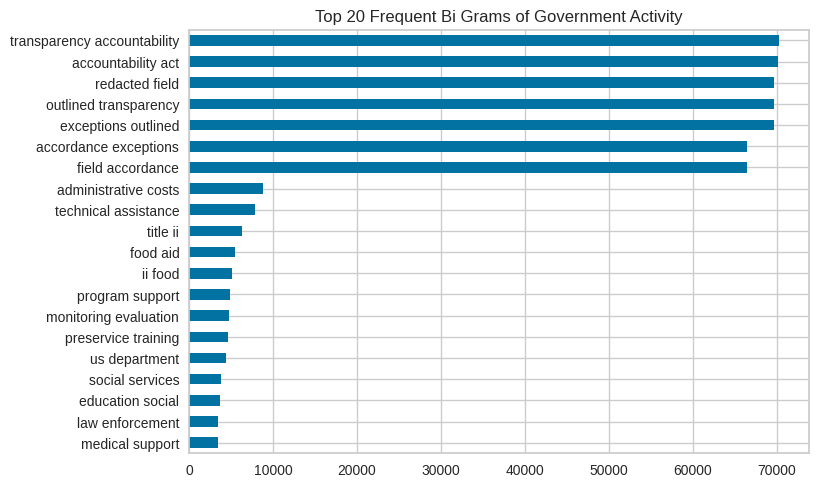

In [138]:
top20_bigrams.head(20).sort_values(ascending = True)\
    .plot(kind="barh",title = "Top 20 Frequent Bi Grams of Government Activity")


In [139]:
sparse_matrix = word_vectorizer.fit_transform(raw_us_aid\
                                                [raw_us_aid.implementing_partner_category_name=='Enterprises']\
                                              ['clean_activity'])

In [140]:
frequencies = sum(sparse_matrix).toarray()[0]

In [141]:
bi_grams_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [142]:
top20_bigrams = bi_grams_df["frequency"].sort_values(ascending = False).head(20)

<AxesSubplot:title={'center':'Top 20 Frequent Bi Grams of Enterprises Activity'}>

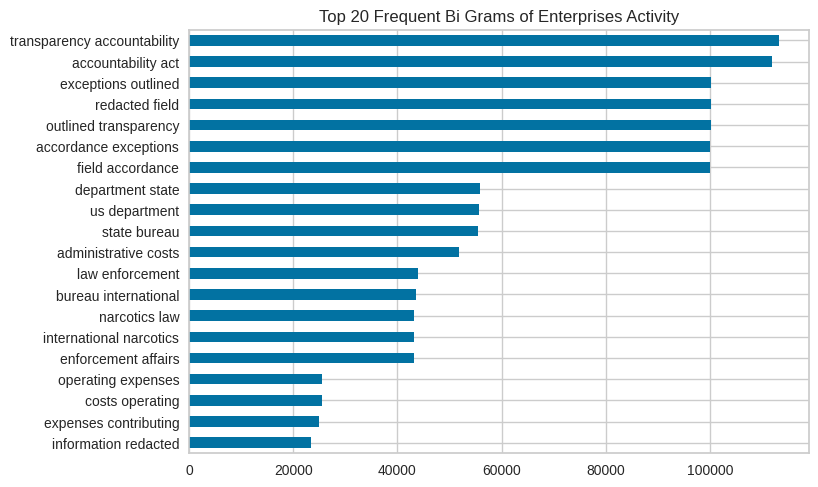

In [143]:
top20_bigrams.head(20).sort_values(ascending = True)\
    .plot(kind="barh",title = "Top 20 Frequent Bi Grams of Enterprises Activity")


## Wordcloud

In [144]:
from wordcloud import WordCloud

In [145]:
#Creating the text variable
govt_text = " ".join(cat for cat in raw_us_aid[raw_us_aid.implementing_partner_category_name=='Government']['clean_activity'])
ent_text = " ".join(cat for cat in raw_us_aid[raw_us_aid.implementing_partner_category_name=='Enterprises']['clean_activity'])

In [146]:
# Creating word_cloud with text as argument in .generate() method
govt_word_cloud = WordCloud(collocations = False, collocation_threshold=3,
                            background_color="white", width=800, height=400).generate(govt_text)

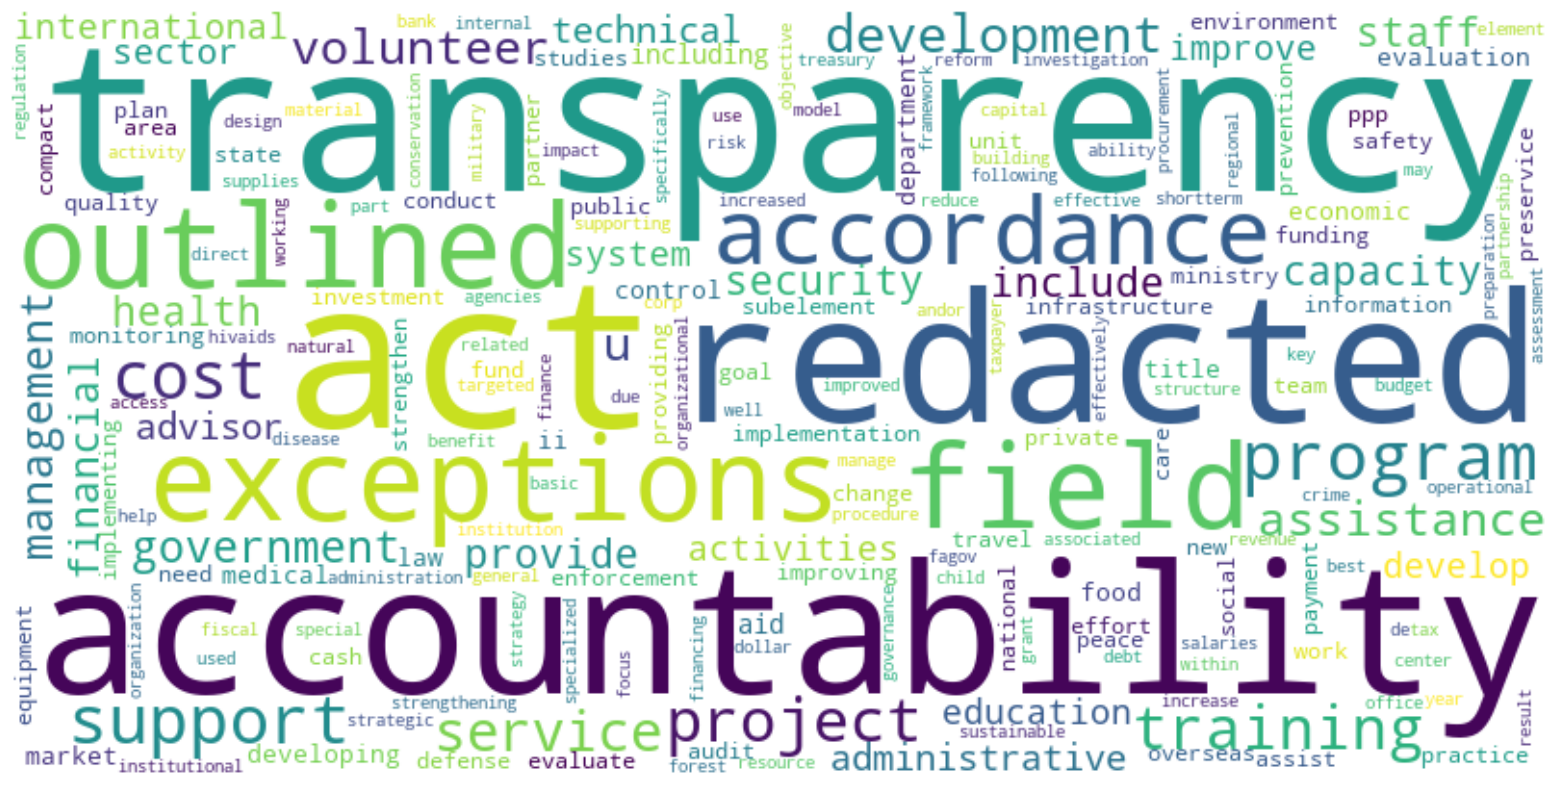

In [147]:
# Display the generated Word Cloud
plt.figure( figsize=(20,10) )
plt.imshow(govt_word_cloud, interpolation='bilinear', )
plt.axis("off")
plt.show()


In [148]:
ent_word_cloud = WordCloud(collocations = False, collocation_threshold=3,
                            background_color="white", width=800, height=400).generate(ent_text)

(-0.5, 799.5, 399.5, -0.5)

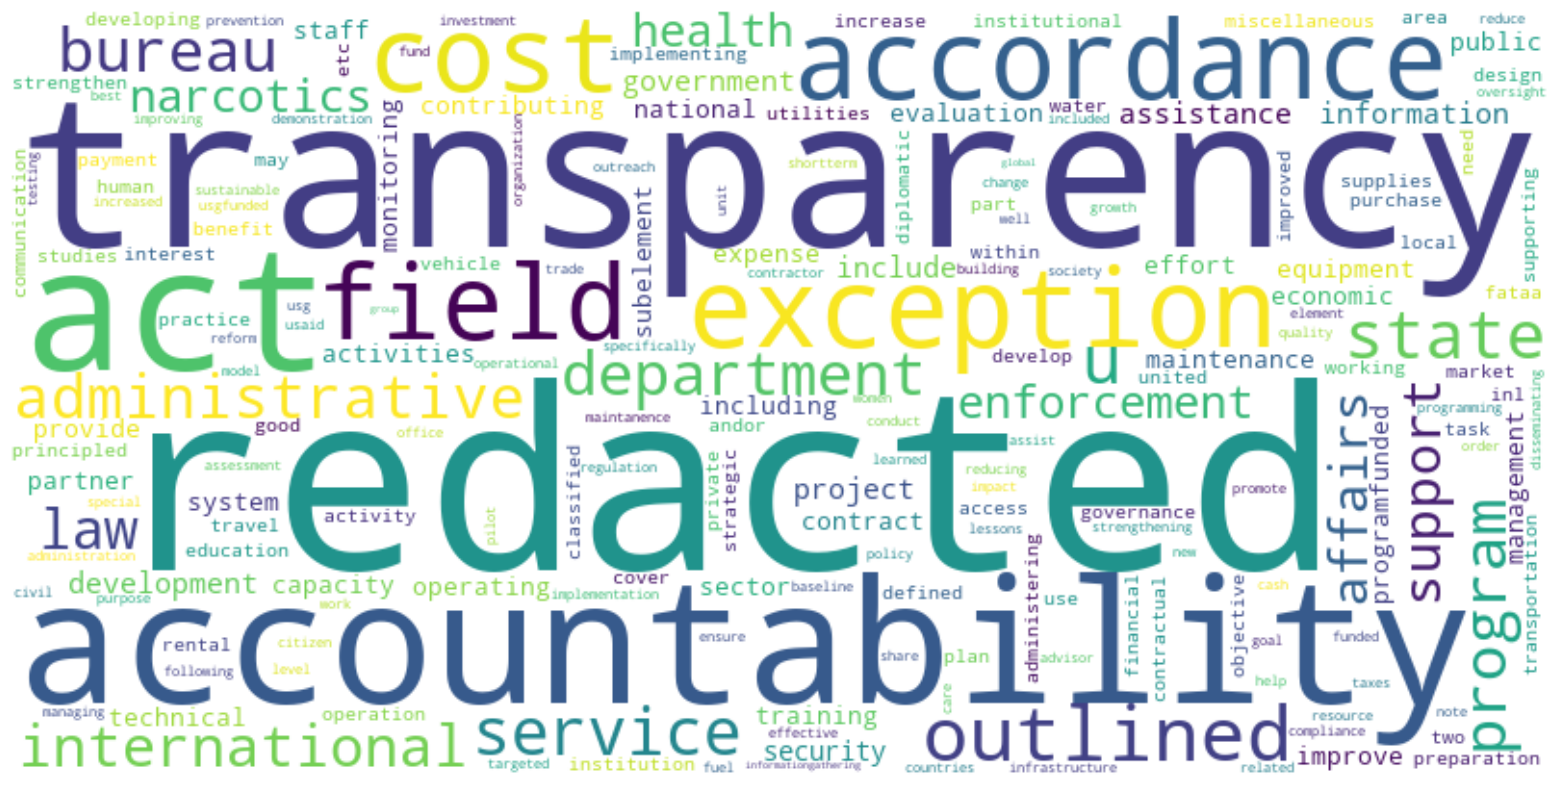

In [149]:
plt.figure( figsize=(20,10) )
plt.imshow(ent_word_cloud, interpolation='bilinear')
plt.axis("off")

In [150]:
#Using count vectoriser to view the frequency of bigrams
bag_of_words = word_vectorizer.fit_transform(raw_us_aid[raw_us_aid.implementing_partner_category_name=='Government']['clean_activity'])

In [151]:
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in word_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

[('transparency accountability', 70345), ('accountability act', 70135), ('redacted field', 69704), ('exceptions outlined', 69704), ('outlined transparency', 69704), ('field accordance', 66493), ('accordance exceptions', 66493), ('administrative costs', 8838), ('technical assistance', 7919), ('title ii', 6278), ('food aid', 5481), ('ii food', 5164), ('program support', 4844), ('monitoring evaluation', 4796), ('preservice training', 4621), ('us department', 4445), ('social services', 3758), ('education social', 3732), ('law enforcement', 3517), ('medical support', 3430), ('safety security', 3415), ('fagov team', 3211), ('team redacted', 3211), ('field exceptions', 3211), ('best practices', 3067), ('overseas program', 2755), ('economic development', 2736), ('support costs', 2687), ('peace corps', 2678), ('goal project', 2627), ('volunteer safety', 2619), ('supplies equipment', 2607), ('funding used', 2586), ('include developing', 2571), ('disease control', 2405), ('costs incurred', 2372),

(-0.5, 1499.5, 999.5, -0.5)

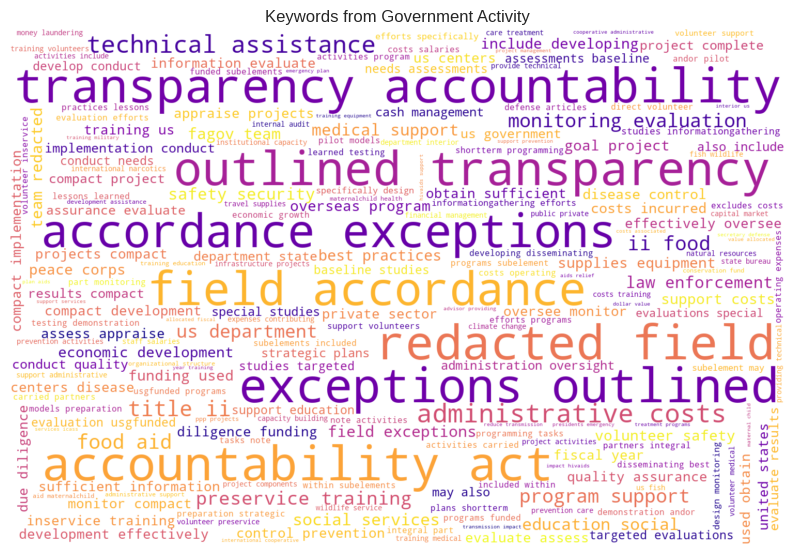

In [152]:


words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,
                      collocation_threshold=3, background_color="white", 
                     colormap="plasma")

plt.figure(figsize=(10, 8))
wordCloud.generate_from_frequencies(words_dict)
plt.imshow(wordCloud, interpolation='bilinear')
plt.title("Keywords from Government Activity")
plt.axis("off")



In [153]:
#Using count vectoriser to view the frequency of bigrams
bag_of_words = word_vectorizer.fit_transform(raw_us_aid[raw_us_aid.implementing_partner_category_name=='Enterprises']['clean_activity'])

In [154]:
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in word_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

[('transparency accountability', 113277), ('accountability act', 111882), ('redacted field', 100197), ('exceptions outlined', 100197), ('outlined transparency', 100197), ('field accordance', 100038), ('accordance exceptions', 100038), ('department state', 55775), ('us department', 55549), ('state bureau', 55448), ('administrative costs', 51884), ('law enforcement', 43990), ('bureau international', 43544), ('international narcotics', 43189), ('narcotics law', 43189), ('enforcement affairs', 43186), ('operating expenses', 25491), ('costs operating', 25475), ('expenses contributing', 24976), ('information redacted', 23370), ('technical assistance', 20729), ('monitoring evaluation', 15310), ('united states', 14225), ('health security', 12539), ('implementing partners', 12144), ('security implementing', 11708), ('redacted information', 11685), ('redacted accordance', 11685), ('accordance two', 11685), ('two principled', 11685), ('principled exceptions', 11685), ('exceptions defined', 11685)

(-0.5, 1499.5, 999.5, -0.5)

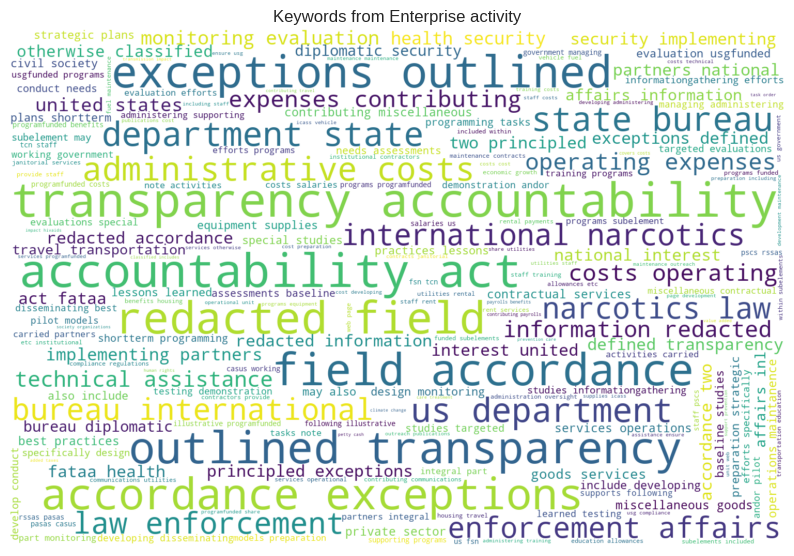

In [155]:
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,
                      collocation_threshold=3, background_color="white")

plt.figure(figsize=(10, 8))
wordCloud.generate_from_frequencies(words_dict)
plt.imshow(wordCloud, interpolation='bilinear')
plt.title("Keywords from Enterprise activity")
plt.axis("off")



## Clustering

In [156]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import word_tokenize

In [157]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/kush/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kush/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [158]:
activities = raw_us_aid['activity_description'].tolist()

In [159]:
tokenized_activities = [word_tokenize(activity.lower()) for activity in activities]

In [160]:
preprocessed_activities = [[word for word in tokens if word.isalnum()
                            and word not in stop_words] for tokens in tokenized_activities]

In [161]:
dictionary = corpora.Dictionary(preprocessed_activities)

In [162]:
corpus = [dictionary.doc2bow(tokens) for tokens in preprocessed_activities]

In [163]:
# Train the LDA model
num_topics = 5
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     random_state=42)

In [164]:
for topic in lda_model.show_topics(num_topics=num_topics):
    print(f"Topic {topic[0]}: {topic[1]}")
    print("\n")

Topic 0: 0.018*"programs" + 0.017*"democratic" + 0.016*"staff" + 0.016*"society" + 0.014*"training" + 0.014*"civil" + 0.012*"costs" + 0.011*"rights" + 0.011*"media" + 0.010*"including"


Topic 1: 0.037*"assistance" + 0.017*"capacity" + 0.017*"sector" + 0.017*"government" + 0.014*"conflict" + 0.013*"protection" + 0.013*"technical" + 0.013*"groups" + 0.013*"public" + 0.011*"population"


Topic 2: 0.116*"redacted" + 0.116*"act" + 0.113*"transparency" + 0.110*"accountability" + 0.109*"2016" + 0.109*"exceptions" + 0.104*"field" + 0.102*"outlined" + 0.101*"accordance" + 0.008*"team"


Topic 3: 0.037*"department" + 0.033*"state" + 0.033*"international" + 0.031*"bureau" + 0.025*"law" + 0.024*"enforcement" + 0.023*"security" + 0.020*"affairs" + 0.020*"covers" + 0.018*"information"


Topic 4: 0.018*"support" + 0.015*"health" + 0.014*"program" + 0.012*"costs" + 0.012*"administrative" + 0.010*"services" + 0.008*"expenses" + 0.007*"contributing" + 0.007*"operating" + 0.006*"project"




In [165]:
lda_model.print_topics()

[(0,
  '0.018*"programs" + 0.017*"democratic" + 0.016*"staff" + 0.016*"society" + 0.014*"training" + 0.014*"civil" + 0.012*"costs" + 0.011*"rights" + 0.011*"media" + 0.010*"including"'),
 (1,
  '0.037*"assistance" + 0.017*"capacity" + 0.017*"sector" + 0.017*"government" + 0.014*"conflict" + 0.013*"protection" + 0.013*"technical" + 0.013*"groups" + 0.013*"public" + 0.011*"population"'),
 (2,
  '0.116*"redacted" + 0.116*"act" + 0.113*"transparency" + 0.110*"accountability" + 0.109*"2016" + 0.109*"exceptions" + 0.104*"field" + 0.102*"outlined" + 0.101*"accordance" + 0.008*"team"'),
 (3,
  '0.037*"department" + 0.033*"state" + 0.033*"international" + 0.031*"bureau" + 0.025*"law" + 0.024*"enforcement" + 0.023*"security" + 0.020*"affairs" + 0.020*"covers" + 0.018*"information"'),
 (4,
  '0.018*"support" + 0.015*"health" + 0.014*"program" + 0.012*"costs" + 0.012*"administrative" + 0.010*"services" + 0.008*"expenses" + 0.007*"contributing" + 0.007*"operating" + 0.006*"project"')]

In [171]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [167]:
pyLDAvis.enable_notebook()

In [169]:
doc_term_matrix = lda_model[corpus]

In [174]:
data = gensimvis.prepare(lda_model, corpus, dictionary)

In [175]:
pyLDAvis.display(data)